#

In [1]:
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&ac

#**구글드라이브 경로 연결**

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

#**필요한 라이브러리설치**

In [3]:
#default code
# !pip3 install torch torchvision
# !pip3 install tqdm
!pip3 install opencv-python~=4.5
# !pip3 install websockets
# !pip3 install torchsummary
# !pip3 install tensorboardX

     |████████████████████████████████| 49.9 MB 16 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


#선, 사각박스, 원 그리기

cv2.line(image, start, end, color, thickness): 하나의 직선을 그리는 함수

- start: 시작 좌표 (2차원)
- end: 종료 좌표 (2차원)
- thickness: 선의 두께

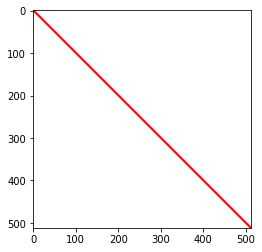

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Red = (255, 0, 0)
# Green = (0, 255, 0)
# Blue = (0, 0, 255)
# White = (255, 255, 255)

img = np.full((512, 512, 3), 255, np.uint8)
img = cv2.line(img, (0, 0), (511, 511), (255, 0, 0), 3)

plt.imshow(img)
plt.show()

cv2.rectangle(image, start, end, color, thickness): 하나의 사각형을 그리는 함수

- start: 시작 좌표 (2차원)
- end: 종료 좌표 (2차원)
- thickness: 선의 두께 (채우기: -1)

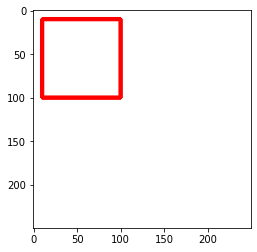

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#cv2 bgr
#matplotlib rgb

red = (255,0,0)
green = (0, 255, 0)
blue = (0,0,255)

img = np.full((250,250,3), 255, np.uint8)
img = cv2.rectangle(img, (10,10), (100,100), red, 3)

plt.imshow(img)
plt.show()

cv2.circle(image, center, radian, color, thickness): 하나의 원을 그리는 함수

- center: 원의 중심 (2차원)
- radian: 반지름
- thickness: 선의 두께 (채우기: -1)

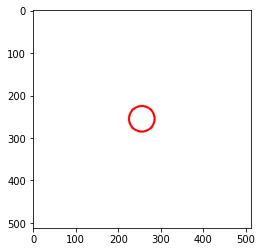

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.full((512, 512, 3), 255, np.uint8)
img = cv2.circle(img, (255, 255), 30, (255, 0, 0), 3)

plt.imshow(img)
plt.show()

cv2.putText(image, text, position, font_type, font_scale, color): 하나의 텍스트를 그리는 함수

- position: 텍스트가 출력될 위치
- font_type: 글씨체
- font_scale: 글씨 크기 가중치

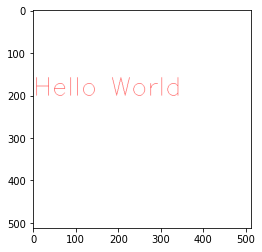

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.putText(image, 'Hello World', (0, 200), cv2.FONT_ITALIC, 2, (255, 0, 0))

plt.imshow(image)
plt.show()

#이미지 불러오기(칼러/흑백)

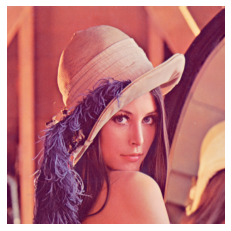

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')#좌표축 숫자 삭제
plt.imshow(img)
plt.show()

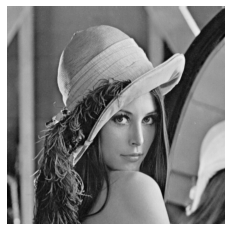

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png", cv2.IMREAD_GRAYSCALE)


plt.axis('off')#좌표축 숫자 삭제
plt.imshow(img, cmap='gray')
plt.show()

#필터 적용
- 가우시안 블러링(Gaussian filter)
- 소벨 필터(Sobel filter)
- 캐니 엣지(Canny edge)

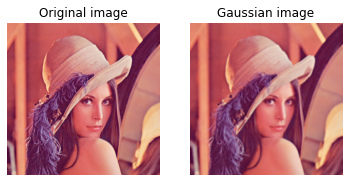

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur = cv2.GaussianBlur(img, (7,7), 0)

fig = plt.figure()
rows = 1
cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img)
ax1.set_title('Original image')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(blur)
ax2.set_title('Gaussian image')
ax2.axis("off")

# plt.imshow(img)
# plt.imshow(blur)
plt.show()

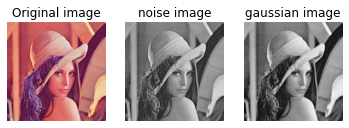

In [12]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
def make_noise(std, gray): 
    height, width = gray.shape 
    img_noise = np.zeros((height, width), dtype=np.float) 
    for i in range(height): 
        for a in range(width): 
            make_noise = np.random.normal() 
            # 랜덤함수를 이용하여 노이즈 적용 
            set_noise = std * make_noise 
            img_noise[i][a] = gray[i][a] + set_noise 
    return img_noise

def run(): 
    img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
    height, width = gray.shape 
    std = 10
    img_noise = make_noise(std, gray)
    blur = cv2.GaussianBlur(img_noise, (7,7), 0)

    fig = plt.figure()
    rows = 1
    cols = 3
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(img)
    ax1.set_title('Original image')
    ax1.axis("off")
    
    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(img_noise, cmap='gray')
    ax2.set_title('noise image')
    ax2.axis("off")

    ax3 = fig.add_subplot(rows, cols, 3)
    ax3.imshow(blur, cmap='gray')
    ax3.set_title('gaussian image')
    ax3.axis("off")

    plt.rcParams['figure.figsize'] = [15, 4]#그림의 크기, (가로,세로)인치 단위
    plt.rcParams['figure.dpi'] = 200

    plt.show()

run()

OpenCV 실습
- 

cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) → dst

Parameters:
- src – input image
- ddepth – output image의 depth, -1이면 input image와 동일.
- dx – x축 미분 차수.(value=0 or 1)
- dy – y축 미분 차수.(value=0 or 1)
- ksize – kernel size(ksize x ksize)

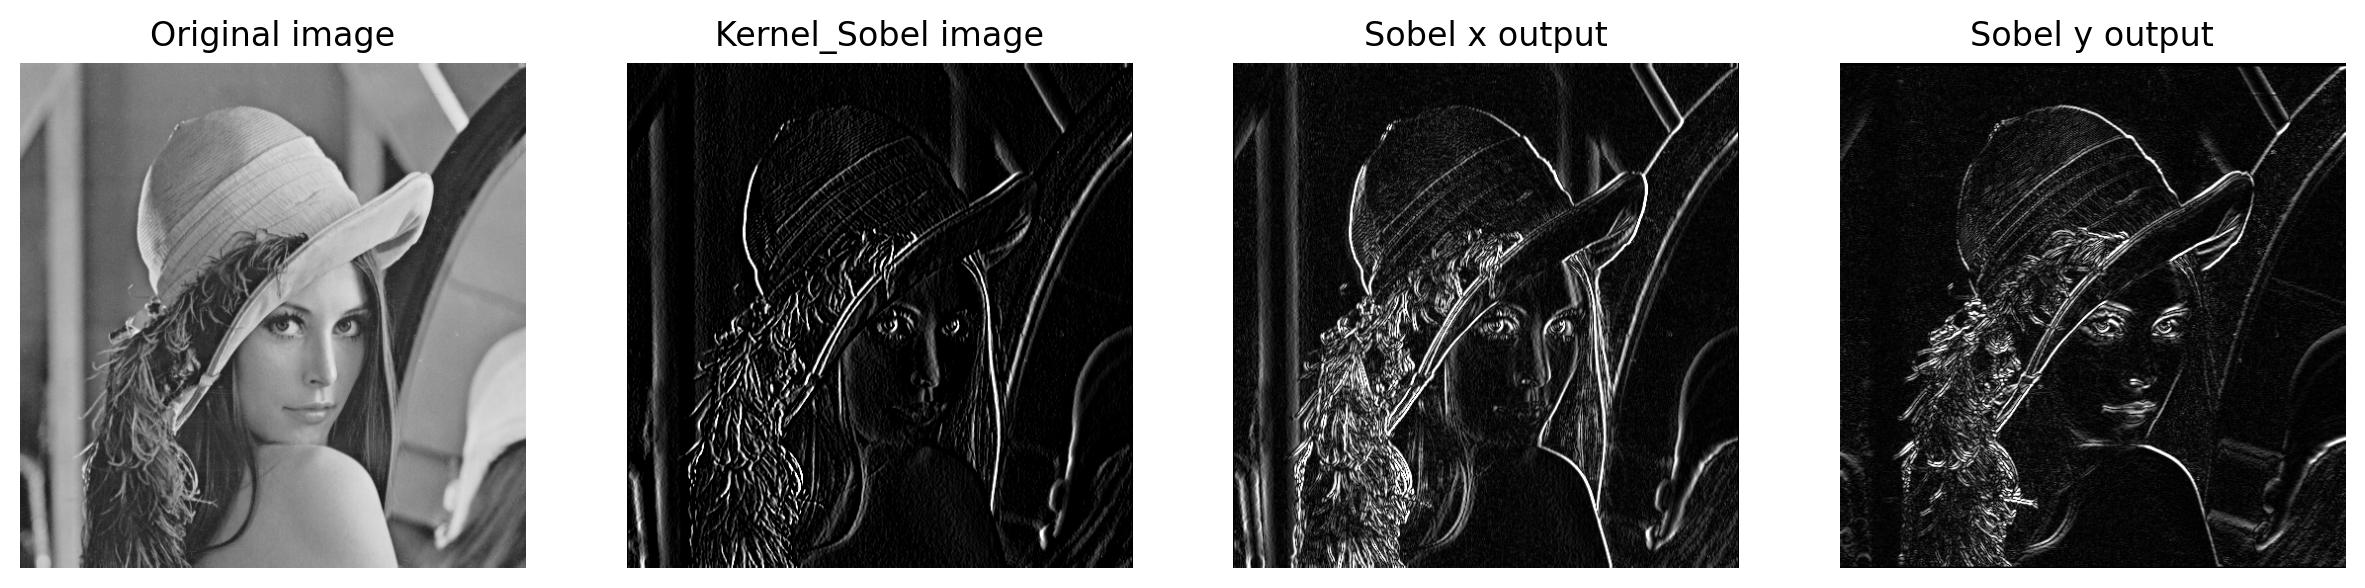

In [14]:
# %matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png", cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel = [[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]]
kernel = np.array(kernel)
output = cv2.filter2D(img, -1, kernel)
output = cv2.convertScaleAbs(output)

output_sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
output_sobel_y = cv2.convertScaleAbs(output_sobel_y)
output_sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
output_sobel_x = cv2.convertScaleAbs(output_sobel_x)

fig = plt.figure()
rows = 1
cols = 4
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img, cmap='gray')
ax1.set_title('Original image')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(output, cmap='gray')
ax2.set_title('Kernel_Sobel image')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(output_sobel_x, cmap='gray')
ax3.set_title('Sobel x output')
ax3.axis("off")

ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(output_sobel_y, cmap='gray')
ax4.set_title('Sobel y output')
ax4.axis("off")
plt.rcParams['figure.figsize'] = [15, 4]#그림의 크기, (가로,세로)인치 단위
plt.rcParams['figure.dpi'] = 200
plt.show()

cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]])

Parameters
- image	8-bit input image.
- edges	output edge map; single channels 8-bit image, which has the same size as image .
- threshold1	first threshold for the hysteresis procedure.
- threshold2	second threshold for the hysteresis procedure.
- apertureSize	aperture size for the Sobel operator.
- L2gradient	
  L2 norm =(dI/dx)^2+(dI/dy)^2(L2gradient=true), or
  L1 norm =|dI/dx|+|dI/dy|( L2gradient=false ).

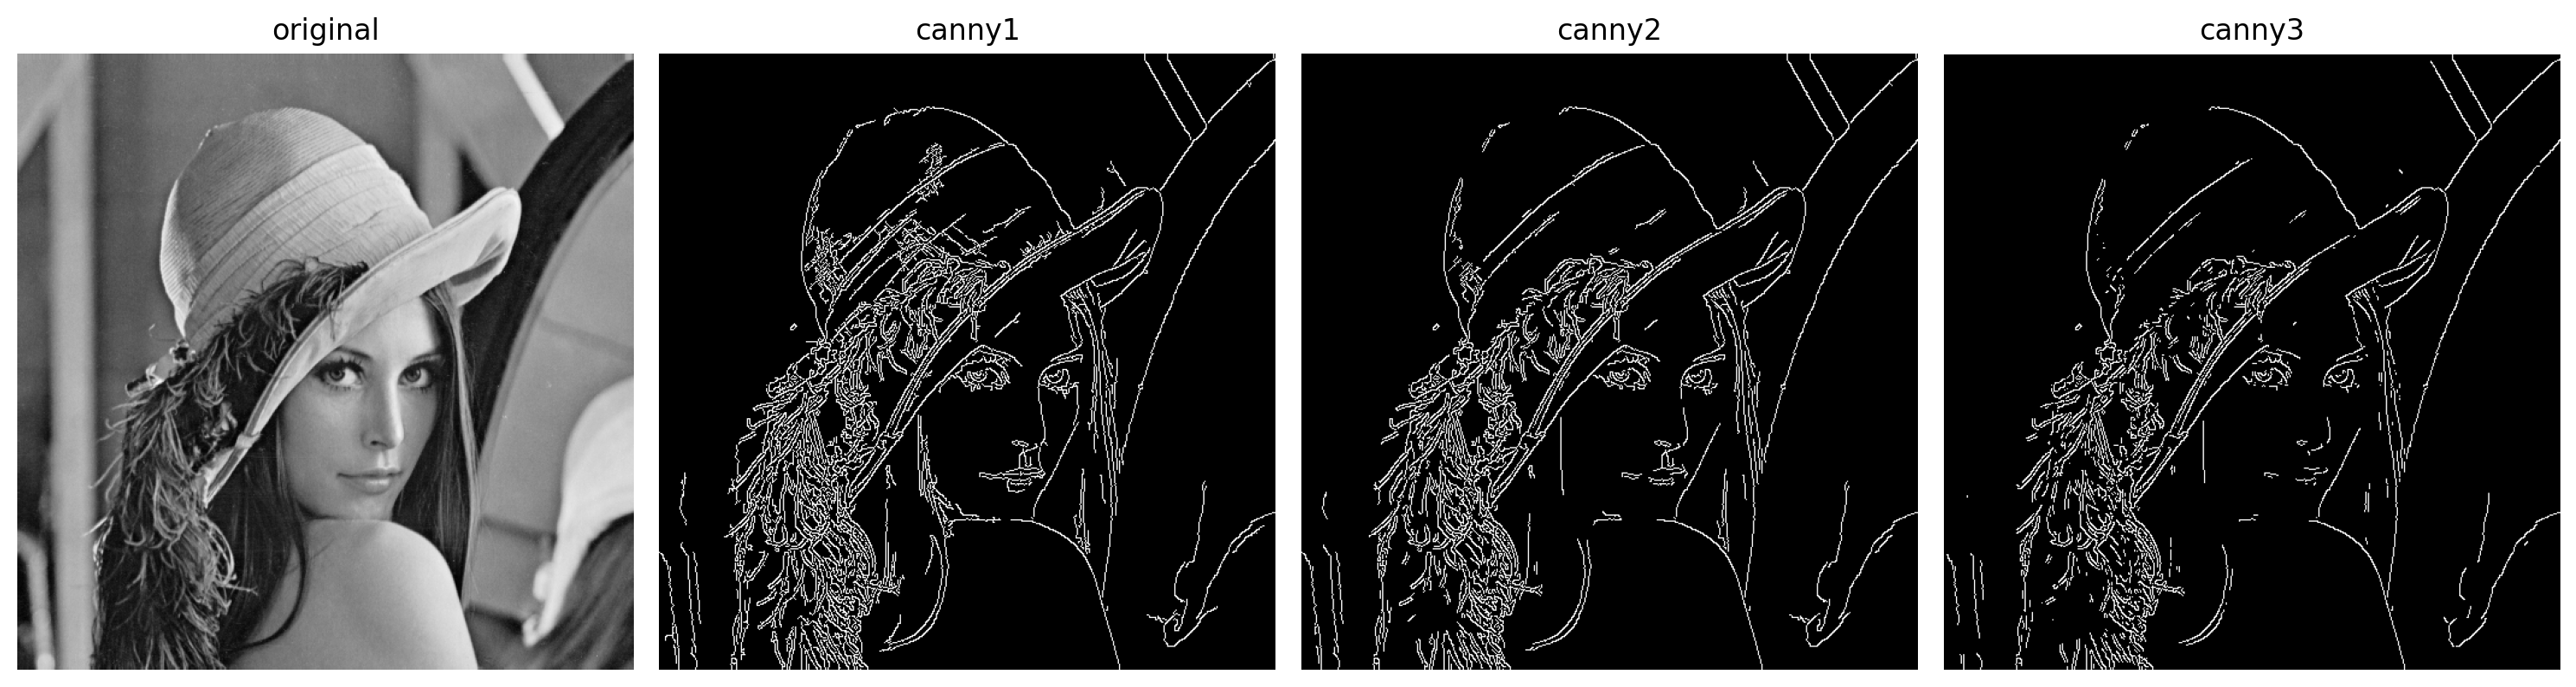

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png", cv2.IMREAD_GRAYSCALE)

canny1 = cv2.Canny(img, 50, 200)
canny2 = cv2.Canny(img, 100, 200)
canny3 = cv2.Canny(img, 170, 200)

titles = ['original', 'canny1', 'canny2', 'canny3']
images = [img, canny1, canny2, canny3]

plt.figure()
rows = 1
cols = 4
for i in range(cols):
    plt.subplot(rows, cols, i+1)
    # plt.imshow(images[i])
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis("off")
    
plt.tight_layout()
plt.show()

highThreshold: 51.0, lowThreshold: 5.1000000000000005


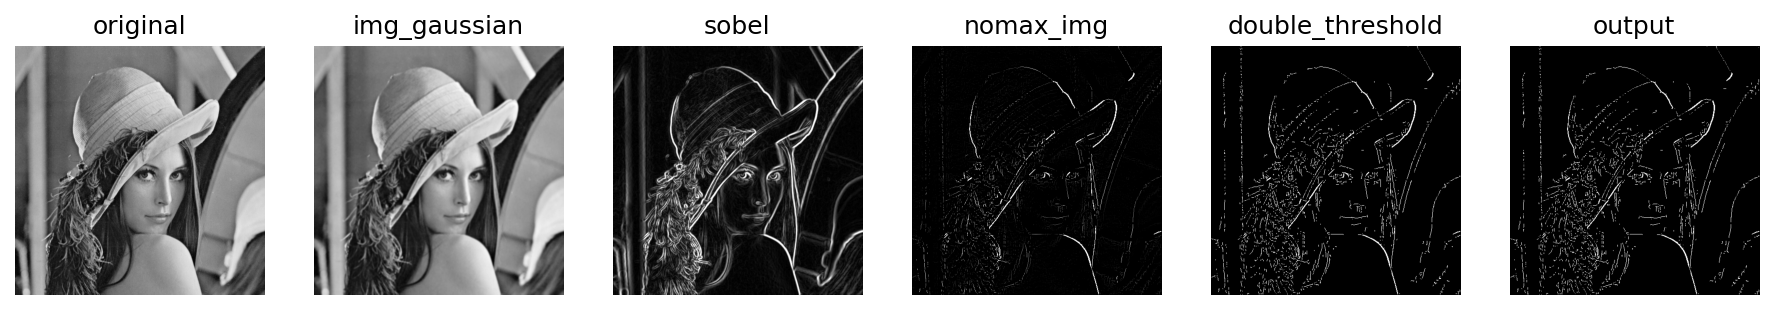

In [19]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    # print(g)
    return g

def sobel_gen(img):
    output_sobel_y = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
    output_sobel_x = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
    
    G = cv2.magnitude(output_sobel_x, output_sobel_y)
    sobel = np.clip(G, 0, 255).astype(np.uint8) # Magnitude의 발산을 막아주기 위해 필수
    directs = cv2.phase(output_sobel_x, output_sobel_y)
    return sobel, directs

    return (G, theta)
def non_max_suppression(img, D):
    M, N = img.shape[:2]
    # print(M,N)
    # print(D.shape)
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180
    # print("angle", angle)
    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    # print(Z)
    return Z

def threshold(img, lowThresholdRatio=0.10, highThresholdRatio=0.20):
    
    highThreshold = img.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio
    print("highThreshold: {}, lowThreshold: {}".format(highThreshold, lowThreshold))
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(100)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    # print([strong_i, strong_j])
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return res, weak, strong

def hysteresis(img, weak=100, strong=255):
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png", cv2.IMREAD_GRAYSCALE)
g = gaussian_kernel(5)
img_gaussian = cv2.filter2D(img, -1, g)#-1은 img와 같은 타입의 값을 생성함
sobel, directs = sobel_gen(img_gaussian)
nomax_img = non_max_suppression(sobel, directs)
nomax_img = np.array(nomax_img, dtype=np.uint8)
double_threshold, weak, strong = threshold(nomax_img)
double_threshold = np.array(double_threshold, dtype=np.uint8)
output = hysteresis(double_threshold, weak=weak, strong=strong)

titles = ['original', 'img_gaussian', 'sobel', 'nomax_img', 'double_threshold', 'output']
images = [img, img_gaussian, sobel, nomax_img, double_threshold, output]

plt.figure()
rows = 1
cols = 6
for i in range(cols):
    plt.subplot(rows, cols, i+1)
    # plt.imshow(images[i])
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis("off")
plt.rcParams['figure.figsize'] = [15, 4]#그림의 크기, (가로,세로)인치 단위
plt.rcParams['figure.dpi'] = 150
plt.show()

#ROI(Region of Insterest)
- 관심영역 추출

(512, 512, 3)


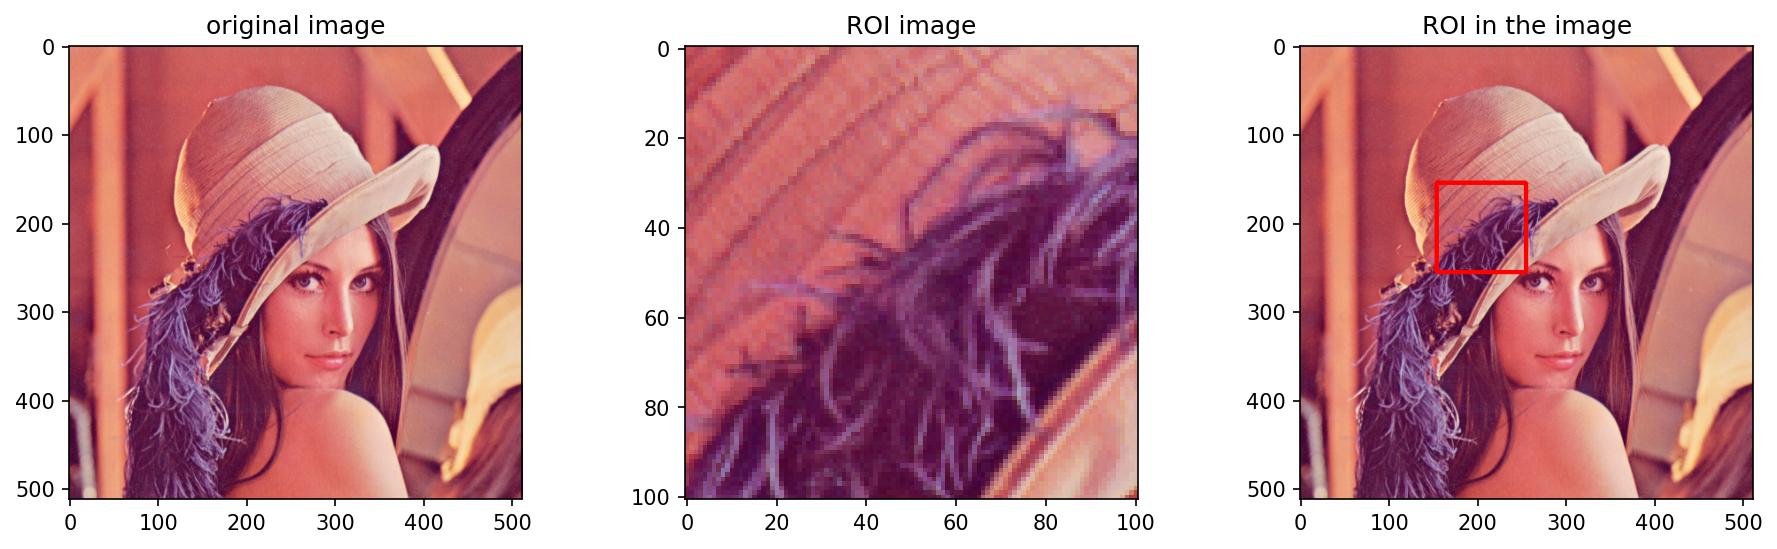

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

#ROI 영역 지정
start_x = 154
start_y = 154
end_x = 255
end_y = 255

ROI = img[start_y:end_y, start_x:end_x]
img_roi = img.copy()
cv2.rectangle(img_roi, (start_y, start_x), (end_y, end_x), (255, 0, 0), 3)

titles = ['original image', 'ROI image', "ROI in the image"]
data = [img, ROI, img_roi]

plt.figure()
row = 1
cols = 3

for i in range(cols):
    plt.subplot(row, cols, i+1)
    plt.title(titles[i])
    plt.imshow(data[i])
plt.show()

#이미지 기하학적 변환
- 회전(rotation)
- 크기조정(Rescale)
- 이동(Translation)
- 아핀변환(Affine Transformation)
- 퍼스펙티브 변환(Perspective Transformation)





---
기하학 행렬 적용 함수
<ul type = "square">
<li>cv2.warpAffine(src, M, dsize)</li>
<ul>
Parameters:

* src – Image
* M – 변환 행렬
* dsize (tuple) – output image size(ex; (width=columns, height=rows)
</ul>
</ul>

<ul type = "square">
<li>cv2.getRotationMatrix2D(center, angle, scale) → M</li>
<ul>
Parameters:

* center – 이미지의 중심 좌표
* angle – 회전 각도
* scale – scale factor
</ul>
</ul>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

height, width = img.shape[:2]

#이미지 중앙을 중심으로 반시계 방향으로 45도 회전시키는 행렬 생성
M = cv2.getRotationMatrix2D((width/2.0, height/2.0), #회전할때 중심점
                             45, #회전각도(양수 반시계방향, 음수 시계방향)
                             1)  #이미지 배율, 1이면 원본 크기
print("M", M)
img_rotated = img.copy()
img_rotated = cv2.warpAffine(img_rotated, M, (width, height))
titles = ['original image', "Rotated image"]
data = [img, img_rotated]

plt.figure()
row = 1
cols = 2

for i in range(cols):
    plt.subplot(row, cols, i+1)
    plt.title(titles[i])
    plt.imshow(data[i])
plt.show()

#이미지 사이즈 변경

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

height, width = img.shape[:2]

img_resize = img.copy()
img_result1 = cv2.resize(img_resize, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
img_result2 = cv2.resize(img_resize, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
titles = ['original image', "resize image = 2x", "resize image = 0.5x"]
data = [img, img_result1, img_result2]

plt.figure()
row = 1
cols = 3

for i in range(cols):
    plt.subplot(row, cols, i+1)
    plt.title(titles[i])
    plt.imshow(data[i])
plt.rcParams['figure.figsize'] = [15, 4]#그림의 크기, (가로,세로)인치 단위
plt.rcParams['figure.dpi'] = 200
plt.show()

#이미지 이동

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/Colab Notebooks/Computer Vision/Image/Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

height, width = img.shape[:2]

img_trans = img.copy()

M = np.float32([[1, 0, 100],[0, 1, 50]])

img_result = cv2.warpAffine(img_trans, M, (width, height))

titles = ['original image', "translation image"]
data = [img, img_result]

plt.figure()
row = 1
cols = 2

for i in range(cols):
    plt.subplot(row, cols, i+1)
    plt.title(titles[i])
    plt.imshow(data[i])
plt.rcParams['figure.figsize'] = [15, 4]#그림의 크기, (가로,세로)인치 단위
plt.rcParams['figure.dpi'] = 200
plt.show()

#허프변환

lines = cv2.HoughLines(	image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])

Parameters
- image	입력이미지
- lines	검출결과, N x 1 x 2(r, θ)
- rho	거리 측정 해상도, 0~1
- theta	각도, 라디안 단위(np.pi/0~180)
- threshold	직선으로 판단할 최소한의 동일 개수 (작은 값: 정확도 감소, 검출 개수 증가 / 큰 값: 정확도 증가, 검출 개수 감소)
- srn, stn	멀티 스케일 허프 변환에 사용, 선 검출에서는 사용 안 함
- min_theta, max_theta	검출을 위해 사용할 최대, 최소 각도<bar><bar>

lines = cv2.HoughLinesP(img, rho, theta, threshold, lines, minLineLength, maxLineGap)

Parameters
- minLineLength(optional): 선으로 인정할 최소 길이
- maxLineGap(optional): 선으로 판단할 최대 간격
- lines: 검출된 선 좌표, N x 1 x 4 배열 (x1, y1, x2, y2)


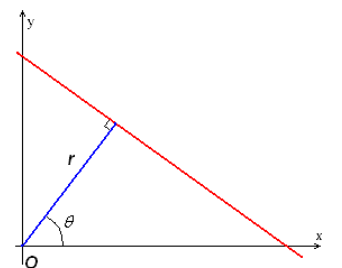

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

def get_crosspt(x11,y11, x12,y12, x21,y21, x22,y22):
    if x12==x11 or x22==x21:
        print('delta x=0')
        return None
    m1 = (y12 - y11) / (x12 - x11)
    m2 = (y22 - y21) / (x22 - x21)
    if m1==m2:
        print('parallel')
        return None
    print(x11,y11, x12, y12, x21, y21, x22, y22, m1, m2)
    cx = (x11 * m1 - y11 - x21 * m2 + y21) / (m1 - m2)
    cy = m1 * (cx - x11) + y11
    return cx, cy

img_ori = cv2.imread("/content/drive/00.image/line_img.jpg")
img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
img = img_ori.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(img_gray, (3,3), 1)
edge = cv2.Canny(img_gaussian, 70, 150)

#cv2.HoughLines(검출 이미지, 거리, 각도, 임곗값, 거리 약수, 각도 약수, 최소 각도, 최대 각도)
lines = cv2.HoughLines(edge,1,np.pi/180,200)
color = [[255,0,0],[0,255,0],[0,0,255],[0,0,0],[255,255,255]]

for i in range(len(lines)):
    
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho#x=rcost
        y0 = b*rho#y=rsint 
        scale = img.shape[0] + img.shape[1]

        x1 = int(x0 + scale * -b)
        y1 = int(y0 + scale * a)
        x2 = int(x0 - scale * -b)
        y2 = int(y0 - scale * a)
        
        cv2.line(img,(x1,y1),(x2,y2),color[i],2)
        cv2.circle(img, (int(x0), int(y0)), 3, (255, 0, 0), 5, cv2.FILLED)
        print(i, (rho, theta),(x0,y0),(x1,y1),(x2,y2))

cross_x, cross_y = get_crosspt(-979,-519,939,588,-852,809,1172,-91)
cv2.circle(img, (int(cross_x), int(cross_y)), 3, (255,2550,0),5, cv2.FILLED)

plt.figure()
fig = plt.figure()
rows = 1
cols = 3
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img_ori)
ax1.set_title('Original image')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(edge, cmap='gray')
ax2.set_title('canny image')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(img)
ax3.set_title('line output')
ax3.axis("off")

# plt.tight_layout()
plt.rcParams['figure.figsize'] = [12, 4]#그림의 크기, (가로,세로)인치 단위
plt.rcParams['figure.dpi'] = 200
plt.show()
